In [1]:
from importlib import reload
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# import modules
import src.models
reload(src.models)
from src.models import *

import src.dataMethods
reload(src.dataMethods)
from src.dataMethods import *

In [8]:
# open up the gestures text file, which contains a list of possible gestures
with open('params/gesturesV1.txt') as f:
    gestures = f.read()
    gestures = gestures.split()
# get dictionaries for those gestures
g2idx = {g: i for i, g in enumerate(gestures)}
idx2g = {i: g for i, g in enumerate(gestures)}
print(g2idx)
print(idx2g)

{'no_gesture': 0, 'fist': 1, 'gun': 2, 'hitchhiking': 3, 'open_close': 4, 'pointing': 5, 'shuffle_over': 6, 'so_so': 7}
{0: 'no_gesture', 1: 'fist', 2: 'gun', 3: 'hitchhiking', 4: 'open_close', 5: 'pointing', 6: 'shuffle_over', 7: 'so_so'}


In [94]:
# get data frame with the variables of interest
# create empty data frame
df = pd.DataFrame()
# read in all training data from loops directory
for file in os.scandir('data/loops/'):
    df2 = CSV2VoI(file)
    df = pd.concat([df, df2], ignore_index=True)

mean fps: 115.19
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.23
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.21
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True


In [154]:
# extract X and y
X_contiguous, y_contiguous = df2X_y(df, g2idx)
X, y = X_y2examples(X_contiguous, y=y_contiguous, n_frames=25)
synced_shuffle(X, y)

dropped 660 of 14419 rows with nans


In [157]:
model = many2one_model(n_features = X.shape[-1], n_frames=X.shape[1], n_gestures=len(g2idx), rnn_units=32, bidirectional = False)

Model: "many2one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 25, 21)]          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 32)                6912      
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 264       
Total params: 7,176
Trainable params: 7,176
Non-trainable params: 0
_________________________________________________________________


In [158]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=30, batch_size = 32, validation_split=0.12)

Train on 454 samples, validate on 63 samples
Epoch 1/30
454/454 [==============================] - 3s 6ms/sample - loss: 2.0403 - accuracy: 0.1784 - val_loss: 1.9065 - val_accuracy: 0.3810
Epoch 2/30
454/454 [==============================] - 0s 446us/sample - loss: 1.8150 - accuracy: 0.3678 - val_loss: 1.7134 - val_accuracy: 0.5714
Epoch 3/30
454/454 [==============================] - 0s 424us/sample - loss: 1.6277 - accuracy: 0.5286 - val_loss: 1.5423 - val_accuracy: 0.6667
Epoch 4/30
454/454 [==============================] - 0s 404us/sample - loss: 1.4521 - accuracy: 0.6366 - val_loss: 1.3743 - val_accuracy: 0.7460
Epoch 5/30
454/454 [==============================] - 0s 402us/sample - loss: 1.2825 - accuracy: 0.6718 - val_loss: 1.1950 - val_accuracy: 0.7619
Epoch 6/30
454/454 [==============================] - 0s 403us/sample - loss: 1.1220 - accuracy: 0.7159 - val_loss: 1.0346 - val_accuracy: 0.7778
Epoch 7/30
454/454 [==============================] - 0s 388us/sample - loss: 0.9

In [159]:
model.save('models/20HS8C25F.h5')

In [15]:
model = tf.keras.models.load_model('models/20HS8C.h5')

In [17]:
# load test data
X_test, y_test = CSV2examples('data/recordings/test_loop.csv', g2idx=g2idx, n_frames=40)

mean fps: 115.19
target fps: 25
skipping every 5 frames
Found left hand data:  False
Found right hand data:  True
dropped 0 of 2777 rows with nans


In [33]:
# predict on a random test case
i = np.random.randint(0, len(X_test))
print(i)
pred = model.predict(np.expand_dims(np.array(X_test[i]), axis=0))
print(pred)
print('Predicted: ', idx2g[np.argmax(pred)])
print('Truth: ', idx2g[y_test[i]])

61
[[0.7459507  0.00782073 0.0061494  0.00837572 0.0217779  0.02478206
  0.01277639 0.17236722]]
Predicted:  no_gesture
Truth:  no_gesture


In [54]:
print(idx2g[y[1]])

so_so


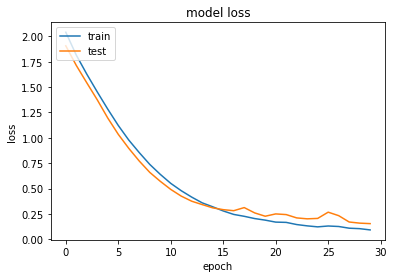

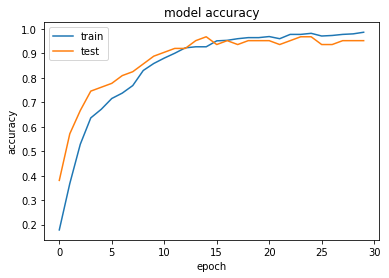

In [160]:
# plot history:
plt_metric(history, 'loss')
plt_metric(history, 'accuracy')

In [47]:
df.columns
df2 = df.reindex(sorted(df.columns), axis=1)
df.columns

Index(['gesture', 'left_index_tipPosition_0', 'left_index_tipPosition_1',
       'left_index_tipPosition_2', 'left_middle_tipPosition_0',
       'left_middle_tipPosition_1', 'left_middle_tipPosition_2',
       'left_ring_tipPosition_0', 'left_ring_tipPosition_1',
       'left_ring_tipPosition_2', 'left_pinky_tipPosition_0',
       'left_pinky_tipPosition_1', 'left_pinky_tipPosition_2',
       'left_thumb_tipPosition_0', 'left_thumb_tipPosition_1',
       'left_thumb_tipPosition_2', 'left_palmVelocity_0',
       'left_palmVelocity_1', 'left_palmVelocity_2', 'left_pinchDistance',
       'left_grabAngle', 'left_direction_0', 'right_index_tipPosition_0',
       'right_index_tipPosition_1', 'right_index_tipPosition_2',
       'right_middle_tipPosition_0', 'right_middle_tipPosition_1',
       'right_middle_tipPosition_2', 'right_ring_tipPosition_0',
       'right_ring_tipPosition_1', 'right_ring_tipPosition_2',
       'right_pinky_tipPosition_0', 'right_pinky_tipPosition_1',
       'right_pi